# 機械学習

## 目次

- 項目の説明
- 欠損値の扱い
- カテゴリー変数の扱い

## Section2 データの解説

In [48]:
# matplotが使えるようにする

import matplotlib
%matplotlib inline

In [49]:
# データのロード

import pandas as pd

data = pd.read_csv("./data/titanic.csv")

### 2.1 項目の説明

In [50]:
# 先頭5行を表示

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）　←　これを予測する
- Pclass – チケットクラス（1st, 2nd, 3rd）
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- Parch – タイタニックに同乗している親/子供の数
- Ticket – チケット番号
- Fare – 料金
- Cabin – 客室番号
- Embarked – タイタニックへ乗った港（C=Cherbourg, S=Southampton, Q=Queenstown）

In [51]:
# データのサイズを確認

data.shape

(891, 12)

In [52]:
# データの欠損・型を確認

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
def nullCountFig(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    counted_table = pd.concat([null_val, percent], axis=1)
    counted_figure = counted_table.rename(
        columns = {0 : '欠損数', 1 : '欠損率(%)'}
    )
    return counted_figure

nullCountFig(data)
    

,欠損数,欠損率(%)
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


### 2.2 欠損値の扱い

欠損には大きく3種類あります。

- 完全にランダムに欠損
- 観測データに依存する欠損（特定のデータのみ欠損）
- 欠損データに依存する欠損（そもそもデータとして収集されていない）

これらを考慮した上で、欠損値に対応する主な方針は4つです。

1. 欠損のある行、列を除外する
2. 何らかの値で埋める（単変量補完】
3. 何らかの値で埋める（多変量補完）
4. 欠損値を受け入れてくれるモデルを使う

#### 1. 欠損のある行、列を除外する

メリット：かんたん

デメリット：予測性能の低下を招きやすい

In [54]:
# 特定のデータを除外する
non_null_data1 = data.drop(['Age', 'Cabin', 'Embarked'], axis=1)
display(non_null_data1)

# 特定のデータを取り出す
non_null_data2 = data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']]
display(non_null_data2)

# 欠損値が一つでも含まれる列を除外する
non_null_data3 = data.dropna()
display(non_null_data3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### 2. 何らかの値で埋める（単変量補完）

メリット：かんたん

デメリット：欠損が多いと効果薄

In [55]:
# 共通の値（0）で埋める
simple_filled_data1 = data.fillna(0)
display(simple_filled_data1)

# 平均値で埋める
## 平均値：.mean()
## 中央値：.median()
## 最瀕値：.mode()
simple_filled_data2 = data.fillna(data.mean())
display(simple_filled_data2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/home/rei/dlc/colab/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#### 3. 何らかの値で埋める（多変量補完）

メリット：予測精度が高くなりがち

デメリット：うまくいかなかった時、原因がわからないがち

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,38.000000,1.0,0.0,71.2833
2,3.0,26.000000,0.0,0.0,7.9250
3,1.0,35.000000,1.0,0.0,53.1000
4,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000
887,1.0,19.000000,0.0,0.0,30.0000
888,3.0,21.132653,1.0,2.0,23.4500
889,1.0,26.000000,0.0,0.0,30.0000


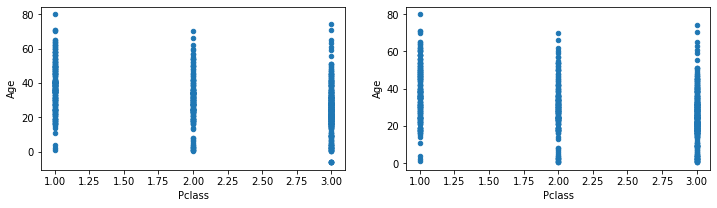

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 散布図で確認するための関数
import matplotlib.pyplot as plt

# 数値だけのデータを作る
only_num_data = data.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
only_num_data_columns = only_num_data.columns

def figmake(df, key):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    df.plot.scatter(x=key, y='Age', ax=axes[0])
    only_num_data.plot.scatter(x=key, y='Age', ax=axes[1])
    plt.show()

# ベイジアンブリッジを使う
bayesian = pd.DataFrame(
                IterativeImputer().fit_transform(only_num_data)
                , columns=only_num_data_columns
            )
display(bayesian)
figmake(bayesian, 'Pclass')


/home/rei/dlc/colab/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,38.000000,1.0,0.0,71.2833
2,3.0,26.000000,0.0,0.0,7.9250
3,1.0,35.000000,1.0,0.0,53.1000
4,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000
887,1.0,19.000000,0.0,0.0,30.0000
888,3.0,17.271667,1.0,2.0,23.4500
889,1.0,26.000000,0.0,0.0,30.0000


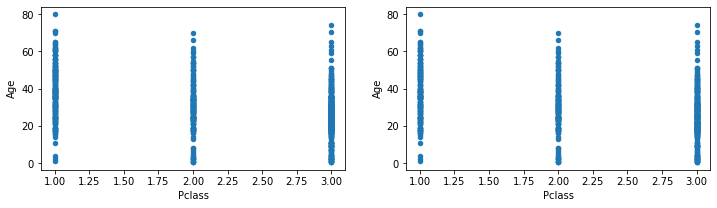

In [71]:
# ランダムフォレストを使う
from sklearn.ensemble import RandomForestRegressor

randf = pd.DataFrame(
            IterativeImputer(RandomForestRegressor()).fit_transform(only_num_data)
            , columns=only_num_data_columns
        )

display(randf)
figmake(randf, 'Pclass')

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000
887,1.0,19.0,0.0,0.0,30.0000
888,3.0,33.0,1.0,2.0,23.4500
889,1.0,26.0,0.0,0.0,30.0000


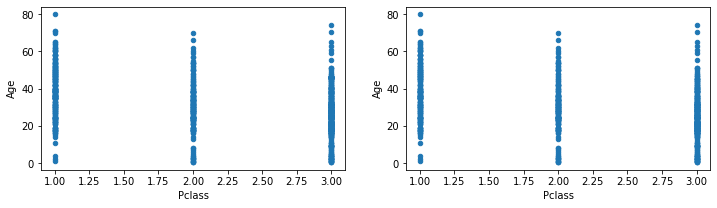

In [72]:
# KNNを使う
from sklearn.impute import KNNImputer

knn = pd.DataFrame(
            KNNImputer(n_neighbors=2).fit_transform(only_num_data)
            , columns=only_num_data_columns
        )

display(knn)
figmake(knn, 'Pclass')

#### 4. 欠損値を受け入れてくれるモデルを使う

メリット：予測精度が高くなりがち

デメリット：ちょっとめんどくさい

XGBoost, LightGBMが有名

### 2.3 カテゴリー変数の扱い

文字列のままでは基本的にモデルへ入力することができないため、代わりとなる数値に変換する必要があります。

一般的に文字列データは量的ではなく質的なデータなため、扱いにくい場合があります。

そこで、[A,B,C]のような複数の値のある要素をAの有無という形式に変換することで扱いやすくします。この処理を **One-Hot エンコーディング** といいます。

In [82]:
from sklearn.preprocessing import OneHotEncoder

# データの確認
embarked_data = data['Embarked'].dropna()

encoder = OneHotEncoder(sparse=False)

display(
    pd.DataFrame(
        encoder.fit_transform(embarked_data.values.reshape(-1, 1))
        ,columns=encoder.categories_
    )
)


,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0
